# 9. Image Enhancement

In [1]:
import cv2
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
ip= input("Enter img name: ")

Enter img name: ./Images/pebbles.png


In [3]:
img= cv2.imread(ip, 0 )
img.shape

(569, 570)

In [4]:
def dig_neg(img, L):
    new_img= L- 1- img
    return new_img

In [5]:
def intensity_level_slicing(img, a, b, L):
    img1= img.copy()
    img1[(a<img) & (img< b)]= L-1
    return img1

In [6]:
def bit_plane_slicing(img):
    
    fig, ax= plt.subplots(nrows= 2, ncols= 4, figsize= (20, 10))
    fsize= 16
    
    img8= (img>>7 & 1 )* (2**7)
    ax[0, 0].set_title("Bit-Plane 8", fontsize= fsize)
    ax[0, 0].imshow(img8, cmap='gray')
    
    img7= (img>>6 & 1 )* (2**6)
    ax[0, 1].set_title("Bit-Plane 7", fontsize= fsize)
    ax[0, 1].imshow(img7, cmap='gray')
    
    img6= (img>>5 & 1 )* (2**5)
    ax[0, 2].set_title("Bit-Plane 6", fontsize= fsize)
    ax[0, 2].imshow(img6, cmap='gray')
    
    img5= (img>>4 & 1 )* (2**4)
    ax[0, 3].set_title("Bit-Plane 5", fontsize= fsize)
    ax[0, 3].imshow(img5, cmap='gray')
    
    img4= (img>>3 & 1 )* (2**3)
    ax[1, 0].set_title("Bit-Plane 4", fontsize= fsize)
    ax[1, 0].imshow(img4, cmap='gray')
    
    img3= (img>>2 & 1 )* (2**2)
    ax[1, 1].set_title("Bit-Plane 3", fontsize= fsize)
    ax[1, 1].imshow(img3, cmap='gray')
    
    img2= (img>>1 & 1 )* (2**1)
    ax[1, 2].set_title("Bit-Plane 2", fontsize= fsize)
    ax[1, 2].imshow(img2, cmap='gray')
    
    img1= (img>>0 & 1 )* (2**0)
    ax[1, 3].set_title("Bit-Plane 1", fontsize= fsize)
    ax[1, 3].imshow(img1, cmap='gray')
    

In [7]:
def thresholding(img, r, L):
    new_img= img.copy()
    new_img[img<r]= 0
    new_img[img>=r]= L-1
    return new_img

def min_max_contrast_stretching(img, L):
    r1= int(np.min(img))
    r2= int(np.max(img))
    s1= 0
    s2= L-1
    print(f"Min-Max Constrast Stretching\n(r1, s1)= ({r1},{s1}) and (r2, s2)= ({r2}, {s2})")
    
    new_img= (np.int32(img)- r1)* ((s2-s1)/(r2-r1))+ s1
    return np.uint8(new_img)

def contrast_stretching_in_range(img, r1, r2, s1, s2, L):
    print(f"Contrast Stretching in given range\n(r1, s1)= ({r1},{s1}) and (r2, s2)= ({r2}, {s2})")
    
    new_img= img.copy()
    new_img[(r1<img) & (img< r2)]= (np.int32(img[(r1<img) & (img< r2)])- r1)* ((s2-s1)/(r2-r1))+ s1
    return np.uint8(new_img)

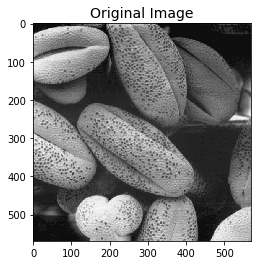

In [8]:
#plt.figure(figsize= (10, 10))
plt.title("Original Image", fontsize= 14)
plt.imshow(img, cmap='gray')
plt.show()

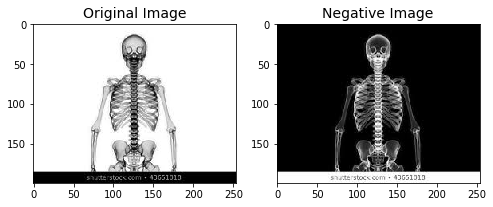

In [9]:
img1= cv2.imread('./Images/x-ray.png', 0)
img_neg= dig_neg(img1, 256)

fig, ax= plt.subplots(ncols= 2, figsize= (8, 4))
fsize= 14

ax[0].set_title("Original Image", fontsize= fsize)
ax[0].imshow(img1, cmap='gray')

ax[1].set_title("Negative Image", fontsize= fsize)
ax[1].imshow(img_neg, cmap='gray')

#plt.imshow(img_neg, cmap= 'gray')
plt.show()

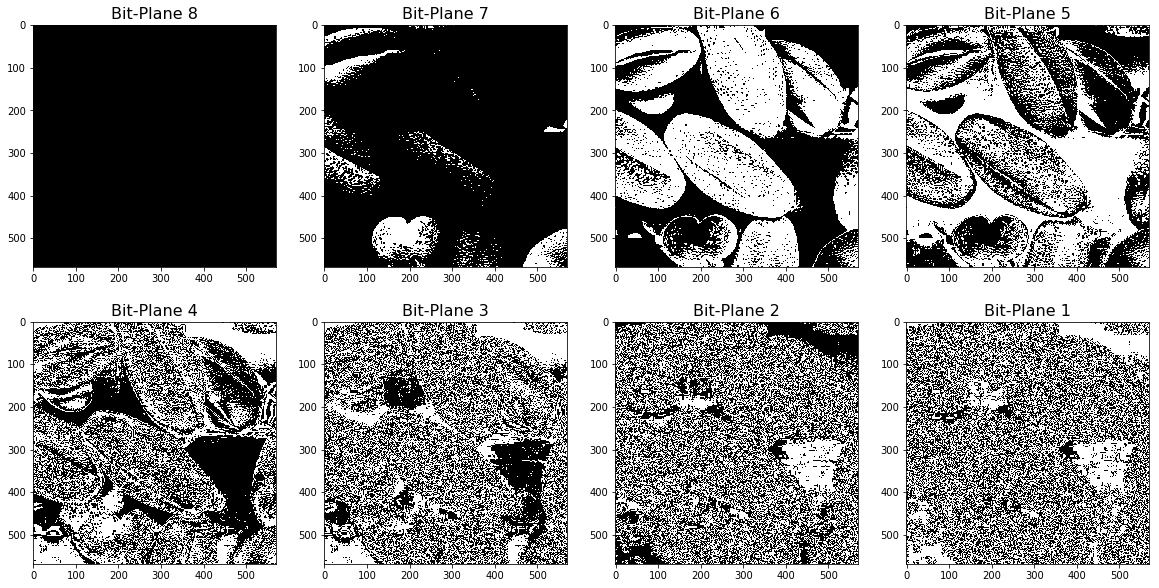

In [13]:
bit_plane_slicing(img)
plt.show()

Enter range of intensity: 35 65


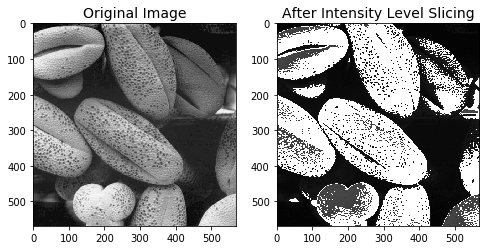

In [11]:
a, b= map(int, input("Enter range of intensity: ").split())

img_intensity_sliced= intensity_level_slicing(img, a, b,256)

fig, ax= plt.subplots(ncols= 2, figsize= (8, 4))
fsize= 14

ax[0].set_title("Original Image", fontsize= fsize)
ax[0].imshow(img, cmap='gray')

ax[1].set_title("After Intensity Level Slicing", fontsize= fsize)
ax[1].imshow(img_intensity_sliced, cmap='gray')

plt.show()

Min-Max Constrast Stretching
(r1, s1)= (9,0) and (r2, s2)= (81, 255)
Enter threshold value, r: 40
Enter r1, r2: 25 55
Enter s1, s2: 15 155
Contrast Stretching in given range
(r1, s1)= (25,15) and (r2, s2)= (55, 155)


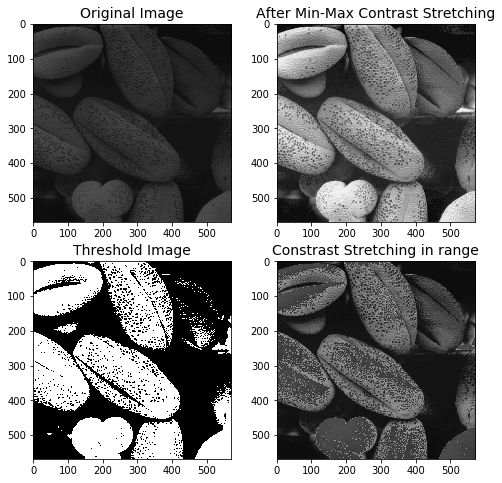

In [26]:
img1= cv2.imread(ip)
img2= cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img_contrast_stretched= min_max_contrast_stretching(img2,  256)

r= int(input("Enter threshold value, r: "))
img_threshold= thresholding(img2, r, 256)


r1, r2= map(int, input("Enter r1, r2: ").split())
s1, s2= map(int, input("Enter s1, s2: ").split())
img_cs_in_range= contrast_stretching_in_range(img2, r1, r2, s1, s2, 256)

fig, ax= plt.subplots(nrows= 2, ncols= 2, figsize= (8, 8))
fsize= 14

ax[0, 0].set_title("Original Image", fontsize= fsize)
ax[0, 0].imshow(img2)

ax[0, 1].set_title("After Min-Max Contrast Stretching", fontsize= fsize)
ax[0, 1].imshow(img_contrast_stretched)

ax[1, 0].set_title("Threshold Image", fontsize= fsize)
ax[1, 0].imshow(img_threshold)

ax[1, 1].set_title("Constrast Stretching in range", fontsize= fsize)
ax[1, 1].imshow(img_cs_in_range)

plt.show()

In [15]:
# x, y= cv2.threshold(img2,40,255,cv2.THRESH_BINARY)
# plt.imshow(y)
# plt.show()